Se truncaron las últimas líneas 5000 del resultado de transmisión.
  -286.94636927]
 [   3.97505969   -1.67006217  239.80966464    1.57178411   -2.80461752
  -286.41367895]
 [   3.97505969   -1.67006217  240.41256368    1.57178411   -2.80461752
  -287.0818153 ]]
Generation :  844
Fitness
[2246.44725661 2242.47963926 2242.10967001 2240.17084948 2237.59458685
 2245.15888064 2243.42819374 2248.67858119]
Best result :  2248.678581187405
Padres
[[   3.97505969   -1.67006217  240.41256368    1.57178411   -2.80461752
  -287.0818153 ]
 [   3.97505969   -1.67006217  240.47431032    1.57178411   -2.80461752
  -286.56108384]
 [   3.97505969   -1.67006217  239.58881961    1.57178411   -2.80461752
  -286.94636927]
 [   3.97505969   -1.67006217  239.80966464    1.57178411   -2.80461752
  -286.41367895]]
Punto de Cruce
[[   3.97505969   -1.67006217  240.41256368    1.57178411   -2.80461752
  -286.56108384]
 [   3.97505969   -1.67006217  240.47431032    1.57178411   -2.80461752
  -286.94636927]
 [   3

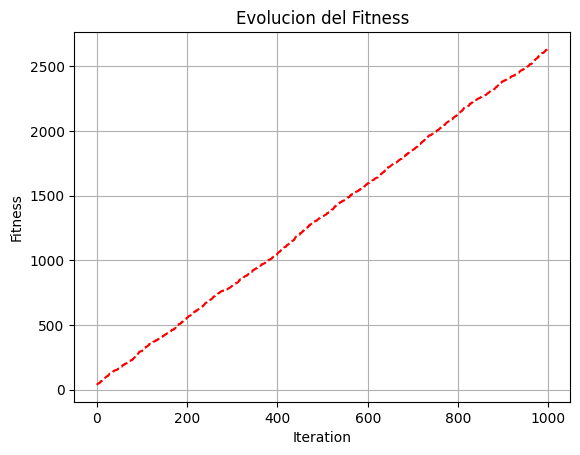

In [3]:
import numpy
import ga

"""
El objetivo de y= es maximizar esta ecuación lo antes posible:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    ¿Cuáles son los mejores valores para las 6 ponderaciones w1 a w6?
    Vamos a utilizar el algoritmo genético para obtener los mejores valores posibles después de varias generaciones.
"""

# Entradas de la ecuación.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

#Número de los pesos que queremos optimizar.
num_weights = len(equation_inputs)

"""
Parámetros del algoritmo genético:
    Tamaño del pool de apareamiento
    Tamaño de la población
"""
sol_per_pop = 8
num_parents_mating = 4

# Definición del tamaño de la población.
pop_size = (sol_per_pop,num_weights) # La población tendrá sol_per_pop cromosoma donde cada cromosoma tiene num_pesos genes..
#Creación de la población inicial
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

"""
new_population[0, :] = [2.4,  0.7, 8, -2,   5,   1.1]
new_population[1, :] = [-0.4, 2.7, 5, -1,   7,   0.1]
new_population[2, :] = [-1,   2,   2, -3,   2,   0.9]
new_population[3, :] = [4,    7,   12, 6.1, 1.4, -4]
new_population[4, :] = [3.1,  4,   0,  2.4, 4.8,  0]
new_population[5, :] = [-2,   3,   -7, 6,   3,    3]
"""

best_outputs = []
num_generations = 1000
for generation in range(num_generations):
    print("Generation : ", generation)
    #  Medición de la aptitud de cada cromosoma de la población.
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # El mejor resultado en la iteración actual.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

    # Selección de los mejores progenitores de la población para el apareamiento.
    parents = ga.select_mating_pool(new_population, fitness,
                                      num_parents_mating)
    print("Padres")
    print(parents)

    # Generación de la siguiente generación mediante cruce.
    offspring_crossover = ga.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Punto de Cruce")
    print(offspring_crossover)

    # Añadir algunas variaciones a la descendencia mediante mutación.
    offspring_mutation = ga.mutation(offspring_crossover, num_mutations=2)
    print("Mutatacion")
    print(offspring_mutation)

    # Creación de la nueva población a partir de los progenitores y la descendencia.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Obtener la mejor solución después de iterar terminando todas las generaciones.
#En primer lugar, se calcula la aptitud de cada solución en la generación final.
fitness = ga.cal_pop_fitness(equation_inputs, new_population)
# A continuación, devuelve el índice de esa solución correspondiente a la mejor aptitud.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Mejor solucion : ", new_population[best_match_idx, :])
print("Mejor fitness de solucion : ", fitness[best_match_idx])


import matplotlib.pyplot as plt
plt.plot(best_outputs, 'r--')
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.title('Evolucion del Fitness')
plt.grid()
plt.show()